In [1]:
import pandas as pd
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [3]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['minute'] = df.date.dt.minute
df['second'] = df.date.dt.second
df.head(15)

,temp,date,year,month,day,hour,minute,second
0,47.8,2010-01-01 00:00:00,2010,1,1,0,0,0
1,47.4,2010-01-01 01:00:00,2010,1,1,1,0,0
2,46.9,2010-01-01 02:00:00,2010,1,1,2,0,0
3,46.5,2010-01-01 03:00:00,2010,1,1,3,0,0
4,46.0,2010-01-01 04:00:00,2010,1,1,4,0,0
5,45.8,2010-01-01 05:00:00,2010,1,1,5,0,0
6,45.9,2010-01-01 06:00:00,2010,1,1,6,0,0
7,45.9,2010-01-01 07:00:00,2010,1,1,7,0,0
8,46.4,2010-01-01 08:00:00,2010,1,1,8,0,0
9,48.0,2010-01-01 09:00:00,2010,1,1,9,0,0


In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.head()

,temp,year,month,day,hour,minute,second
date,,,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,0,0,0
2010-01-01 01:00:00,47.4,2010,1,1,1,0,0
2010-01-01 02:00:00,46.9,2010,1,1,2,0,0
2010-01-01 03:00:00,46.5,2010,1,1,3,0,0
2010-01-01 04:00:00,46.0,2010,1,1,4,0,0


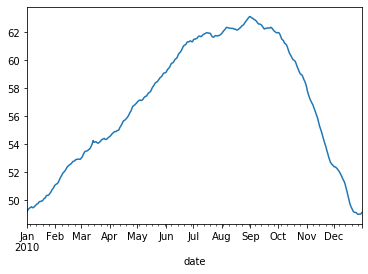

In [6]:
df.resample('D').mean().temp.plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

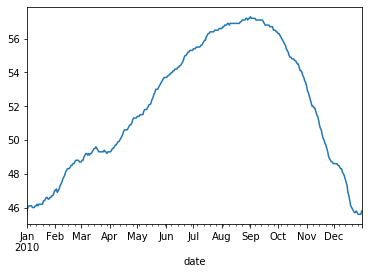

In [7]:
df.resample('D').min().temp.plot()

# 3. Write the code necessary to visualize the maximum temperature over time.

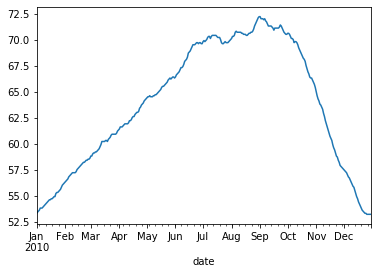

In [8]:
df.resample('D').max().temp.plot()

# 4. Which month is the coldest, on average?

In [9]:
# temp_reading gives you the average min temp
temp_reading = df.resample('M').temp.mean().min()
# Selects the coldest month on average
coldest_month = df.resample('M').mean().idxmin()[0]
# Converts the string into the month name with .strftime('%B')
coldest_month = coldest_month.strftime('%B')
print(f'{coldest_month} was the coldest month on an average at {round(temp_reading,2)} degrees fahrenheit')

January was the coldest month on an average at 49.98 degrees fahrenheit


# 5. Which month has the highest average temperature?

In [10]:
# temp_reading gives you the average max temp
temp_reading = df.resample('M').mean().temp.max()
# Selects the warmest month on average
warmest_month = df.resample('M').mean().idxmax()[0]
# Converts the string into the month name with .strftime('%B')
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the warmest month on an average at {round(temp_reading,2)} degrees fahrenheit')

September was the warmest month on an average at 62.49 degrees fahrenheit


# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [11]:
# Resampling day to aggregate for min and max
df = df.resample('D')['temp'].agg(['min','max'])

In [12]:
df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [13]:
df['variability'] = df['max'] - df['min']
df.head()

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [43]:
temp_reading = df.resample('D').variability.max().idxmax()
temp_reading
warmest_month = df.idxmax()[0]
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the the month with the highest variability')

September was the the month with the highest variability


In [41]:
df['2010-08-31':'2010-08-31'].variability

date
2010-08-31    15.0
Freq: D, Name: variability, dtype: float64

# Seatles weather

In [66]:
df = data.seattle_weather()

In [67]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [68]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [69]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [70]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [71]:
df = df.set_index('date').sort_index()

In [73]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


# 1. Which year and month combination has the highest amount of precipitation?

In [61]:
df.shape

(1461, 8)

In [62]:
df.resample('M').precipitation.max().idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

# 2. Visualize the amount of monthly precipitation over time.

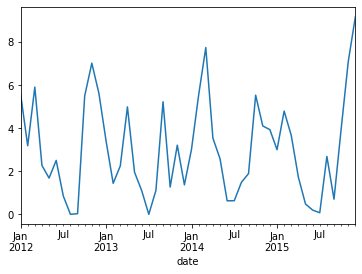

In [86]:
df.resample('M').precipitation.mean().plot()

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [76]:
df2 = df['2015-01-01':'2015-12-31']
df2

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2015-01-01,0.0,5.6,-3.2,1.2,sun,2015,1,1
2015-01-02,1.5,5.6,0.0,2.3,fog,2015,1,2
2015-01-03,0.0,5.0,1.7,1.7,fog,2015,1,3
2015-01-04,10.2,10.6,3.3,4.5,fog,2015,1,4
2015-01-05,8.1,12.2,9.4,6.4,fog,2015,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,2015,12,27
2015-12-28,1.5,5.0,1.7,1.3,fog,2015,12,28
2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29


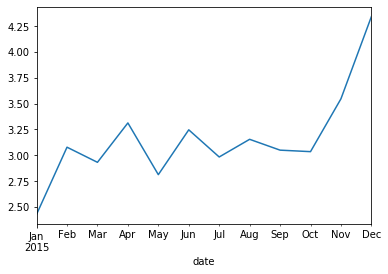

In [83]:
df2.resample('M').wind.mean().plot()

# 4. Which year-month combination is the windiest?

In [90]:
df = df.resample('M').wind.mean()
df.head()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'wind'